In [1]:
import utils
from preprocessing import *
SIZE = 256

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
img_train, mask_train = prepareDataset(TRAIN_CONTOUR_PATH, TRAIN_IMG_PATH)
img_test, mask_test = prepareDataset(TEST_CONTOUR_PATH, TEST_IMG_PATH)
img_val, mask_val = prepareDataset(VAL_CONTOUR_PATH, VAL_IMG_PATH)

Number of examples: 260

Processing 260 images and labels ...

Number of examples: 279

Processing 279 images and labels ...

Number of examples: 266

Processing 266 images and labels ...



In [3]:
ROI_train = get_ROI(TRAIN_CONTOUR_PATH)

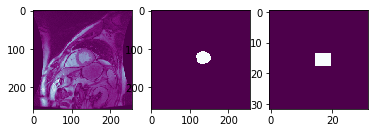

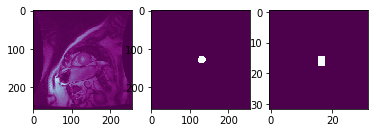

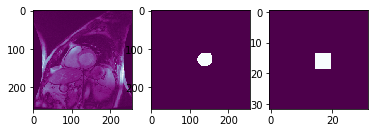

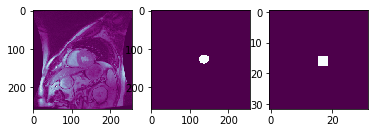

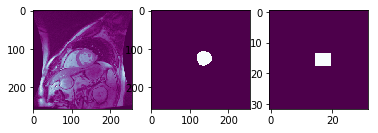

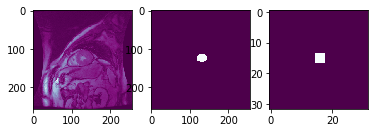

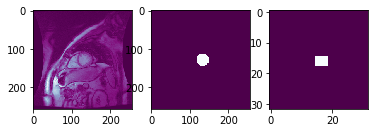

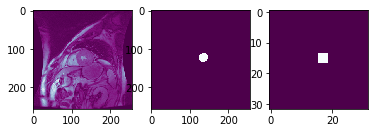

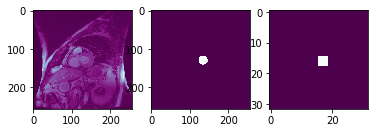

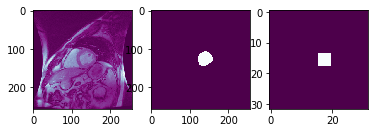

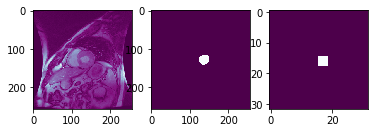

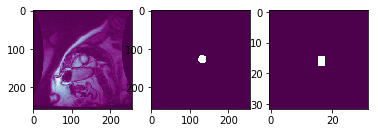

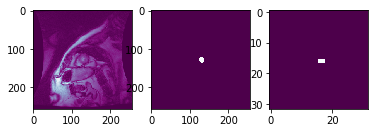

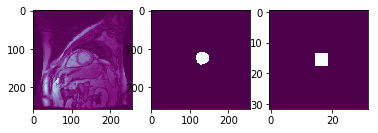

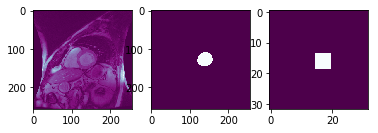

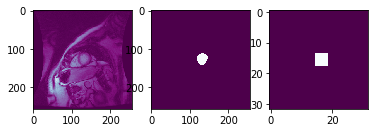

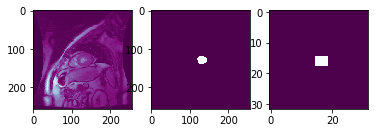

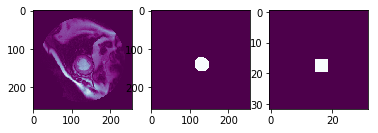

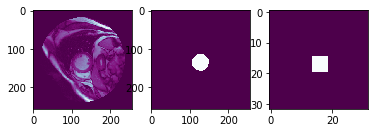

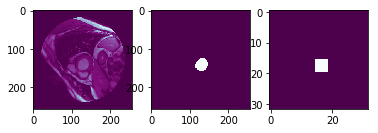

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
for i in range(20):
    mask = mask_train[i, :, :, 0]
    img = img_train[i, :, :, 0]
    plt.figure()
    plt.subplot(131)
    plt.imshow(img, cmap=plt.cm.BuPu_r)
    plt.subplot(132)
    plt.imshow(mask, cmap=plt.cm.BuPu_r)
    plt.subplot(133)
    plt.imshow(ROI_train[i],cmap=plt.cm.BuPu_r)

In [6]:
#reshape the data for CNN

print(img_train.shape)
print(len(ROI_train))
print(len(ROI_train[0]))
X = np.zeros((img_train.shape[0], 64, 64, 1))
for i in range(X.shape[0]):
    X[i,:,:,0] = cv2.resize(img_train[i,:,:,0], (64, 64), interpolation = cv2.INTER_LINEAR)
Y = np.array(ROI_train).reshape((len(ROI_train),1, 32, 32))

(260, 256, 256, 1)
260
32


(260, 64, 64, 1)
(260, 1, 32, 32)


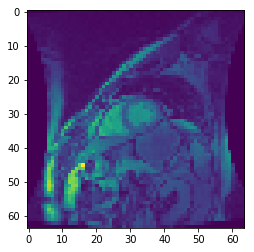

In [7]:
print(X.shape)
print(Y.shape)
plt.imshow(X[0,:,:,0])

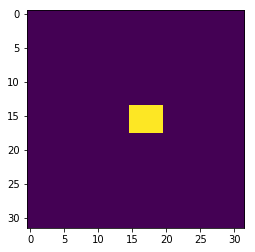

In [8]:
plt.imshow(Y[0,0,:,:])

In [56]:
from baseline_model import *
model = create_model()

Size for each layer :
Layer, Input Size, Output Size
('Conv2D_5', (None, 64, 64, 1), (None, 54, 54, 100))
('Average_Pooling2D_5', (None, 54, 54, 100), (None, 9, 9, 100))
('Reshape_9', (None, 9, 9, 100), (None, 1, 8100))
('Dense_5', (None, 1, 8100), (None, 1, 1024))
('Reshape_10', (None, 1, 1024), (None, 1, 32, 32))


In [57]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
h = training(model, X, Y, batch_size=16, epochs= 20, data_augm=False)

Epoch 1/20
260/260 [==============================] - 4s 16ms/step - loss: 0.2248 - acc: 0.2246
Epoch 2/20
 16/260 [>.............................] - ETA: 3s - loss: 0.1647 - acc: 0.3164

KeyboardInterrupt: 